# 5. selenium 사용하기
* 웹페이지 테스트 자동화 도구
* https://selenium-python.readthedocs.io/

### selenium 설치
* anaconda selenium 검색

### 크롬 드라이버 다운로드
* 크롬 브라우저 버전 확인

In [2]:
#conda install -c conda-forge selenium

In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

driver_path = 'C:\\Users\\qkrwn\\JupyterLab\\JupyterLa\\JupyterLab\\chromedriver_win32\\chromedriver.exe'
driver = webdriver.Chrome(driver_path)

driver.get("http://www.python.org")
print(driver.title)

elem = driver.find_element_by_name("q")
elem.clear()
elem.send_keys("pycon")

time.sleep(3)
elem.send_keys(Keys.RETURN)
time.sleep(3)

print(driver.page_source)
driver.close()

Welcome to Python.org
<html class="js no-touch geolocation fontface generatedcontent svg formvalidation placeholder boxsizing retina" lang="en" dir="ltr" style=""><!--<![endif]--><head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">
    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-status-bar-style" content="black">

    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <meta name="HandheldFriendly" content="True">
    <meta name="format-detection" content="telephone=

### 네이버 자동 검색하기

NAVER
<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/93.0.4577.63 safari/537.36" data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="디미고 : 네이버 통합검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'디미고'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'디미고'의 네이버 통합검색 결과입니다."> <title>디미고 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link rel="styleshee
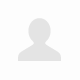
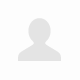
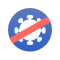
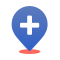
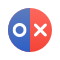
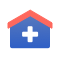

In [4]:
driver = webdriver.Chrome(driver_path)

driver.get("http://www.naver.com")
print(driver.title)

elem = driver.find_element_by_id("query")
elem.clear()
elem.send_keys("디미고")

time.sleep(3)
elem.send_keys(Keys.RETURN)
time.sleep(3)

print(driver.page_source)
driver.close()

## 스타벅스 매장 찾기

In [5]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


driver = webdriver.Chrome(driver_path)

driver.get("https://www.starbucks.co.kr/store/store_map.do?disp=locale")
print(driver.title)

WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.CSS_SELECTOR, ".set_sido_cd_btn"))
)

seoul = '#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a'
driver.find_element_by_css_selector(seoul).click()

time.sleep(3)

all = '#mCSB_2_container > ul > li:nth-child(1) > a'
driver.find_element_by_css_selector(all).click()
time.sleep(3)

html = driver.page_source
driver.close()

Starbucks Coffee Korea


In [6]:
from bs4 import BeautifulSoup
import pandas as pd

In [7]:
soup = BeautifulSoup(html)
stores = soup.select('.quickResultLstCon')
stores


[<li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>,
 <li class="quickResultLstCon" data-code="3672" data-hlytag="null" data-index="1" data-lat="37.510178" data-long="127.022223" data-name="논현역사거리" data-storecd="1434" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="논현역사거리" data-store="1434" data-yn="N">논현역사거리  </strong> <p class="result_details">서울특별시 강남구 강남대로 538 (논현동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>,
 <li class="quickResultLstCon" data-code="3858" data-hlytag="null" data-index="2" data-lat="37.514132" data-long="127.020563" data-name="신사역성일빌딩" data-storecd="1595" style="backg

In [8]:
store_list = []
for store in stores:
    name = store['data-name'].strip()
    lat = store['data-lat']
    long = store['data-long']
    address = store.find('p').get_text()
    store_list.append([name,lat,long,address])
store_list

[['역삼아레나빌딩', '37.501087', '127.043069', '서울특별시 강남구 언주로 425 (역삼동)1522-3232'],
 ['논현역사거리', '37.510178', '127.022223', '서울특별시 강남구 강남대로 538 (논현동)1522-3232'],
 ['신사역성일빌딩', '37.514132', '127.020563', '서울특별시 강남구 강남대로 584 (논현동)1522-3232'],
 ['국기원사거리', '37.499517', '127.031495', '서울특별시 강남구 테헤란로 125 (역삼동)1522-3232'],
 ['스탈릿대치R', '37.494668', '127.062583', '서울특별시 강남구 남부순환로 2947 (대치동)1522-3232'],
 ['봉은사역', '37.515000', '127.063196', '서울특별시 강남구 봉은사로 619 (삼성동)1522-3232'],
 ['압구정윤성빌딩', '37.5227934', '127.0286009', '서울특별시 강남구 논현로 834 (신사동)1522-3232'],
 ['코엑스별마당', '37.510150', '127.060275', '서울특별시 강남구 영동대로 513 (삼성동)1522-3232'],
 ['삼성역섬유센터R', '37.507750', '127.060651', '서울특별시 강남구 테헤란로 518 (대치동)1522-3232'],
 ['압구정R', '37.5273669', '127.033061', '서울특별시 강남구 언주로 861 (신사동)1522-3232'],
 ['수서역R', '37.488008', '127.102650', '서울특별시 강남구 광평로 281 (수서동)1522-3232'],
 ['양재강남빌딩R', '37.485192', '127.036685', '서울특별시 강남구 남부순환로 2621 (도곡동)1522-3232'],
 ['선릉동신빌딩R', '37.505321', '127.050409', '서울특별시 강남구 테헤란로 409 (삼성동)1522-323

In [9]:
columns = ['매장명','위도','경도','주소']
df = pd.DataFrame(store_list,columns=columns)
df

,매장명,위도,경도,주소
0,역삼아레나빌딩,37.501087,127.043069,서울특별시 강남구 언주로 425 (역삼동)1522-3232
1,논현역사거리,37.510178,127.022223,서울특별시 강남구 강남대로 538 (논현동)1522-3232
2,신사역성일빌딩,37.514132,127.020563,서울특별시 강남구 강남대로 584 (논현동)1522-3232
3,국기원사거리,37.499517,127.031495,서울특별시 강남구 테헤란로 125 (역삼동)1522-3232
4,스탈릿대치R,37.494668,127.062583,서울특별시 강남구 남부순환로 2947 (대치동)1522-3232
...,...,...,...,...
560,사가정역,37.579594,127.087966,서울특별시 중랑구 면목로 3101522-3232
561,상봉역,37.59689,127.08647,서울특별시 중랑구 망우로 307 (상봉동)1522-3232
562,묵동이마트,37.613433,127.077484,"서울특별시 중랑구 동일로 932 (묵동, 묵동자이아파트) (묵동이마트 B1층)152..."
563,묵동,37.615368,127.076633,서울특별시 중랑구 동일로 952 1522-3232
